Google Drive ile bağlantı kurulur

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# LOAD LIBRARIES

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

"Dosya Seç" e tıklanarak bilgisayardaki data yüklenir

In [4]:
from google.colab import files
uploaded = files.upload()

import io
veri = pd.read_csv(io.BytesIO(uploaded['supermarket.csv']))

Saving supermarket.csv to supermarket.csv


In [5]:
df = pd.read_csv("supermarket.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#EDA (Exploratory Data Analysis)

In [6]:
#ilk 5 satırı gösterir
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
#Rastgele 5 satırı gösterir
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
99,733-01-9107,B,Mandalay,Normal,Male,Home and lifestyle,82.70,6,24.8100,521.0100,3/5/2019,18:14,Cash,496.20,4.761905,24.8100,7.4
596,152-68-2907,A,Yangon,Normal,Male,Food and beverages,52.20,3,7.8300,164.4300,2/15/2019,13:30,Credit card,156.60,4.761905,7.8300,9.5
972,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,7,30.4780,640.0380,1/26/2019,15:17,Cash,609.56,4.761905,30.4780,5.5
662,725-67-2480,B,Mandalay,Member,Female,Fashion accessories,58.75,6,17.6250,370.1250,3/24/2019,18:14,Credit card,352.50,4.761905,17.6250,5.9
69,382-03-4532,A,Yangon,Member,Female,Health and beauty,18.33,1,0.9165,19.2465,2/2/2019,18:50,Cash,18.33,4.761905,0.9165,4.3


In [8]:
#Veri seti hakkında bilgi verir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
# Hangi sütunda kaç tane boş veri var onu gösterir
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
# İstatistik verilerini gösterir 
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [11]:
#Bir sütunun diğer bir sütuna olan bağlılığını gösterir
# -1 ve 1' e yakınsa yüksek, 0'a yakınsa düşük
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<AxesSubplot:>

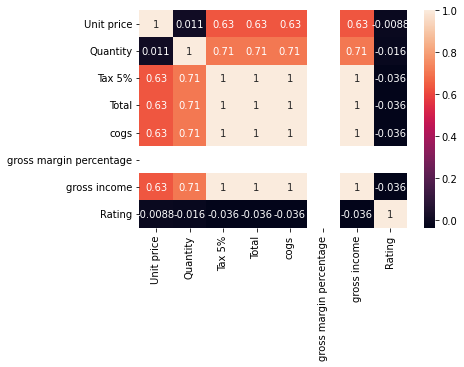

In [12]:
#Korelasyonu grafik halinde gösterilmiş halidir.
sns.heatmap(df.corr(),annot=True)

In [13]:
# ‘unique()’ verilen verinin kaç adet ‘eşşiz’ verisi olduğunu bize verir
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [14]:
#Bir müşteri minumum ne kadar harcamış
df.Total.min()

10.6785

In [15]:
#Bir müşteri maximum ne kadar harcamış
df.Total.max()

1042.65

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


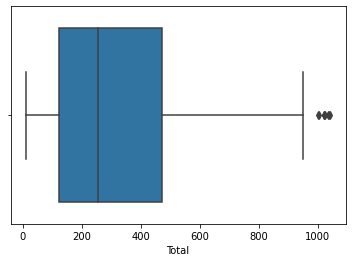

In [16]:
# Boxplot ,hata ayıklama, uç değerleri ve aşırı değerleri saptamak için de kullanılır
sns.boxplot(df.Total);

Grafiğe baktığımız zaman 3 kişinin ortalamadan daha fazla harcama yaptığının çıkarımında bulunabiliriz.
Bunu da 3 noktanın outliar olmasından anladık.
Noktalar outlier değerlerdir.

In [17]:
#value_counts() ise hangi değerden kaç adet olduğunu veren bir fonksiyon
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

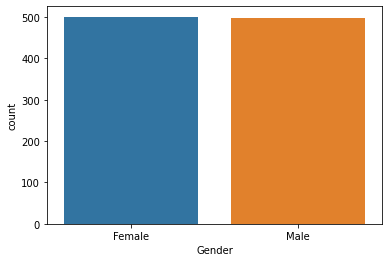

In [18]:
sns.countplot(x=df.Gender)

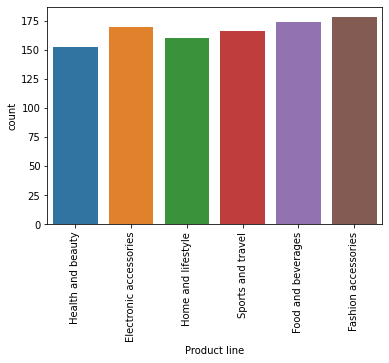

In [19]:
#Hangi katagoriden kaç tane satıldığını öğrenmek için
sns.countplot(x=df["Product line"])
plt.xticks(rotation=90);

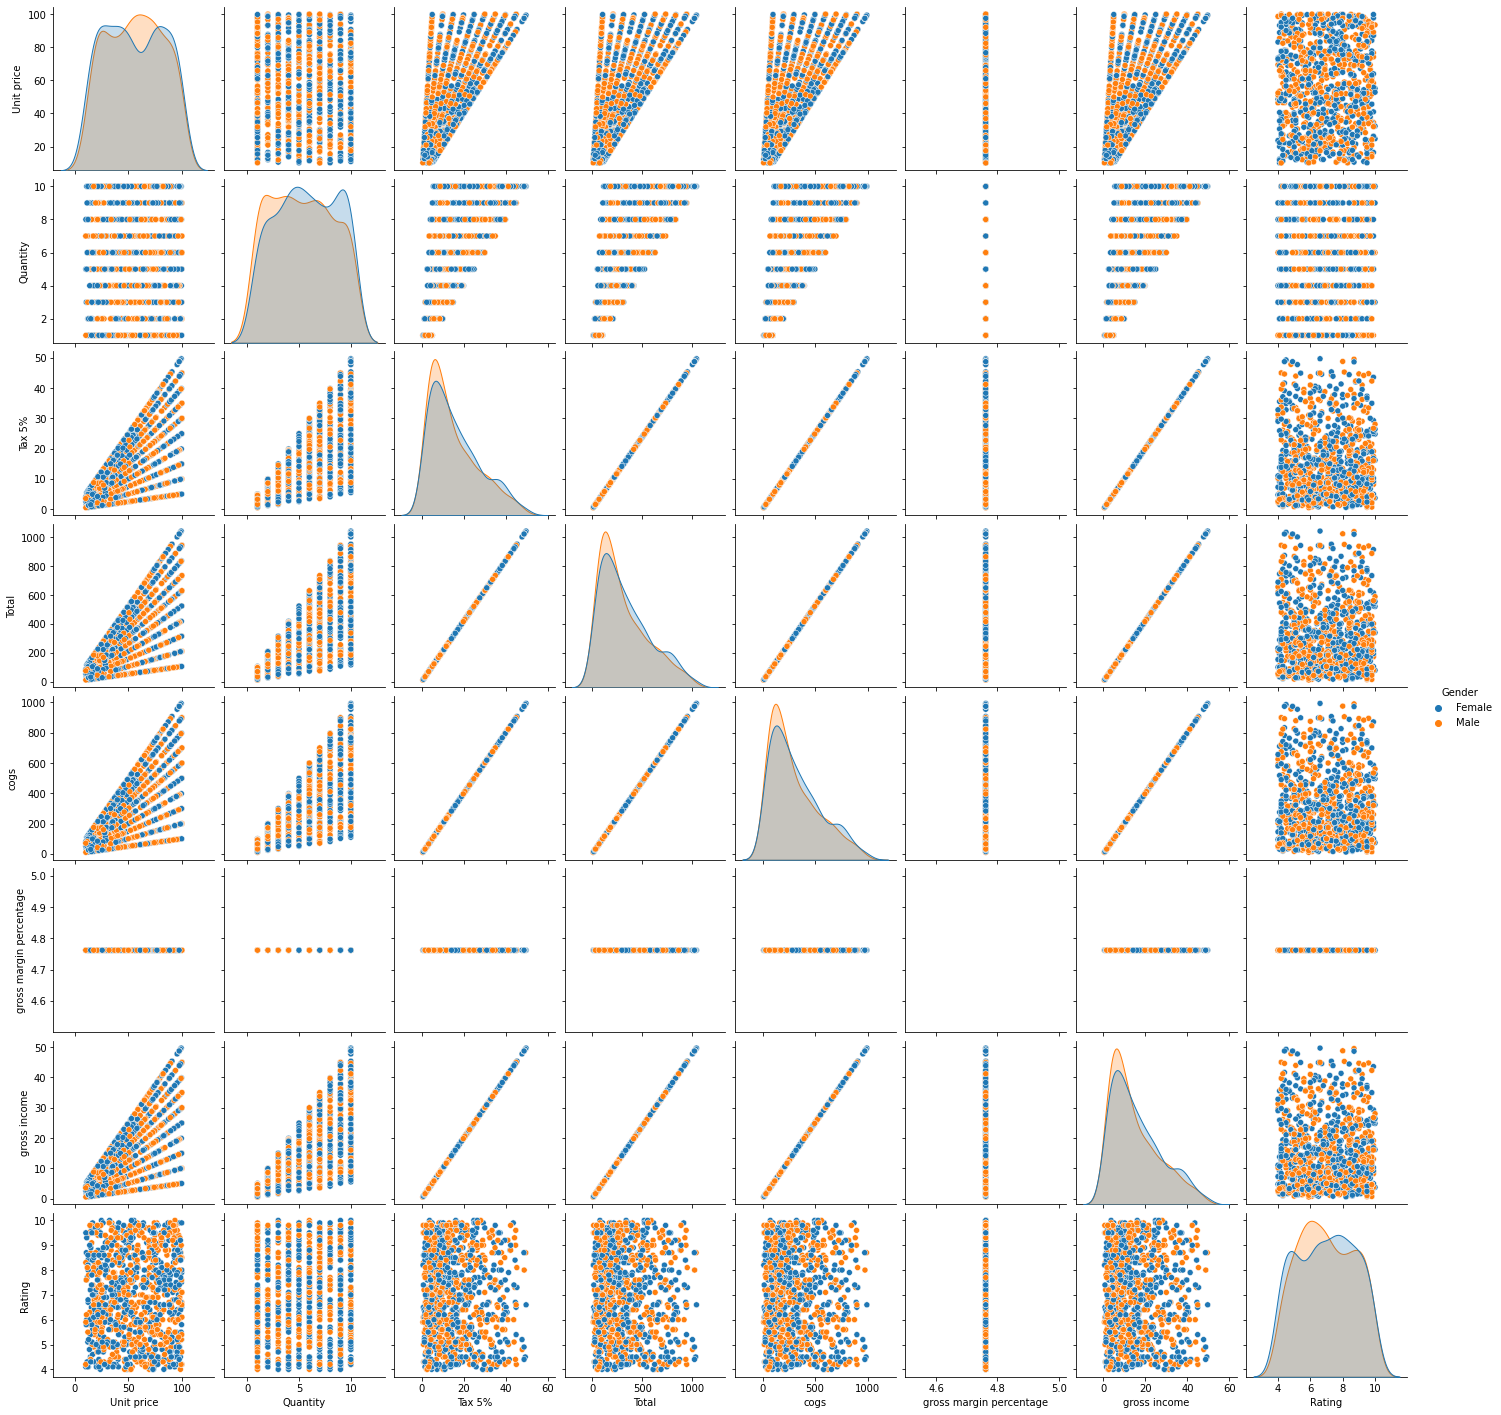

In [20]:
#Bütün sütunların karşılaştırmasını tek bir kodla da yapabiliriz
#Bunu cinsiyete göre yapmak istersek
#pairplot() tüm veri çerçevesi boyunca, sayısal sütunlar için çift yönlü ilişkiler çizer.
sns.pairplot(df,hue="Gender")

#Feature Engineering

Feature Engineering = Ham verileri seçme, manipüle etme ve kullanılabilecek özelliklere dönüştürme işlemidir.

In [21]:
#Hangi günde daha fazla satış yapıldığını bulmak istiyoruz 
#Ama obje halinde olduğu için önce düzenlenmesi gerekir
df["Date"]=pd.to_datetime(df["Date"])

In [22]:
#Ayın hangi gününe geldiğini bulmak için
df["Day"]=(df["Date"]).dt.day
df["Month"]=(df["Date"]).dt.month
df["Year"]=(df["Date"]).dt.year
df["month_name"]=df["Date"].dt.month_name()
df["weekday"]=df["Date"].dt.day_name()

In [23]:
# Type düzenlemesi yapılması gerekiyor
df["Time"]=pd.to_datetime(df["Time"])

In [24]:
#Hangi satte çok alışveriş yapılıyor onu bulmak için saati çıkarıyoruz
df["Hour"]=(df["Time"]).dt.hour

In [25]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,month_name,weekday,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday,10


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

Dtype 'ın değiştiğini buradan gözlemleyebiliriz.

<AxesSubplot:xlabel='month_name', ylabel='count'>

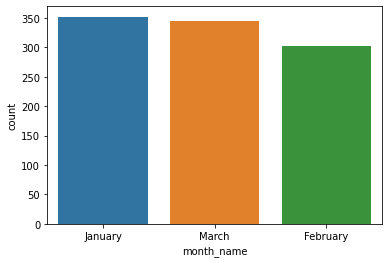

In [27]:
#Aylara göre satış
sns.countplot(x=df["month_name"])

En çok mart ayında satış yapıldığını anlıyoruz

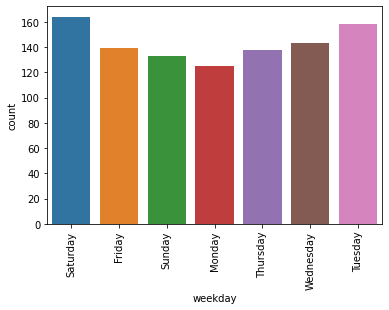

In [28]:
#Günlere göre satış
sns.countplot(x=df["weekday"])
plt.xticks(rotation=90);

En fazla cumartesi satış yapıldığını anlıyoruz

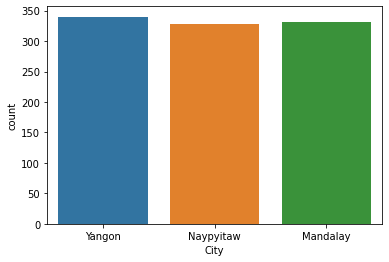

In [29]:
sns.countplot(x=df["City"]);

En fazla Yangon şehrinde satış yapıldığını anlıyoruz

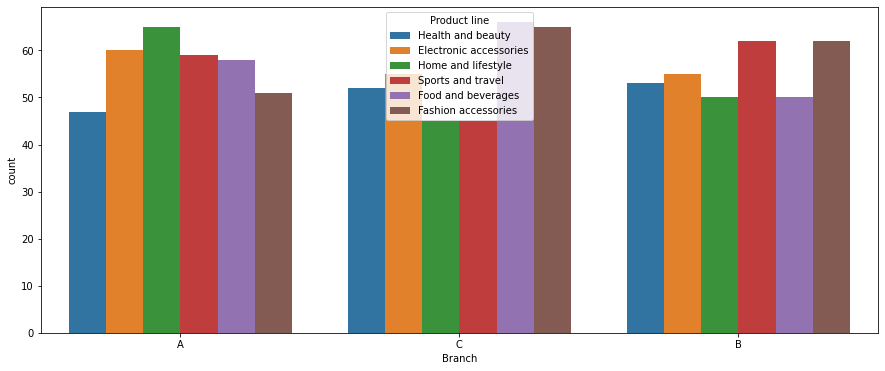

In [30]:
#Hangi şubede hangi ürün daha çok satış görmek için
plt.figure(figsize=(15,6))
sns.countplot(x=df.Branch,hue=df["Product line"]);

NOT
plt.legend(loc="upper left")
tabnine = otamatik yazmam gereken şeyleri gösterir


<AxesSubplot:xlabel='Customer type', ylabel='count'>

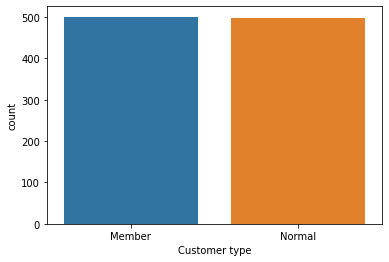

In [31]:
#Müşterilerin üye olup olmadığını kontrol ettik
sns.countplot(x=df["Customer type"])

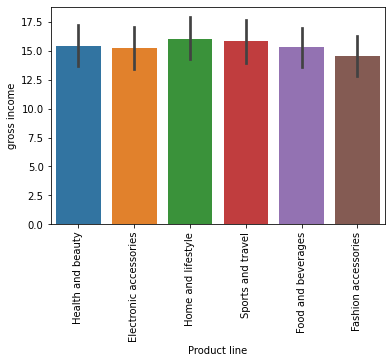

In [32]:
#Hangi üründen ne kadar para kazanıldığını görmek için
sns.barplot(x=df["Product line"],y=df["gross income"])
plt.xticks(rotation=90);

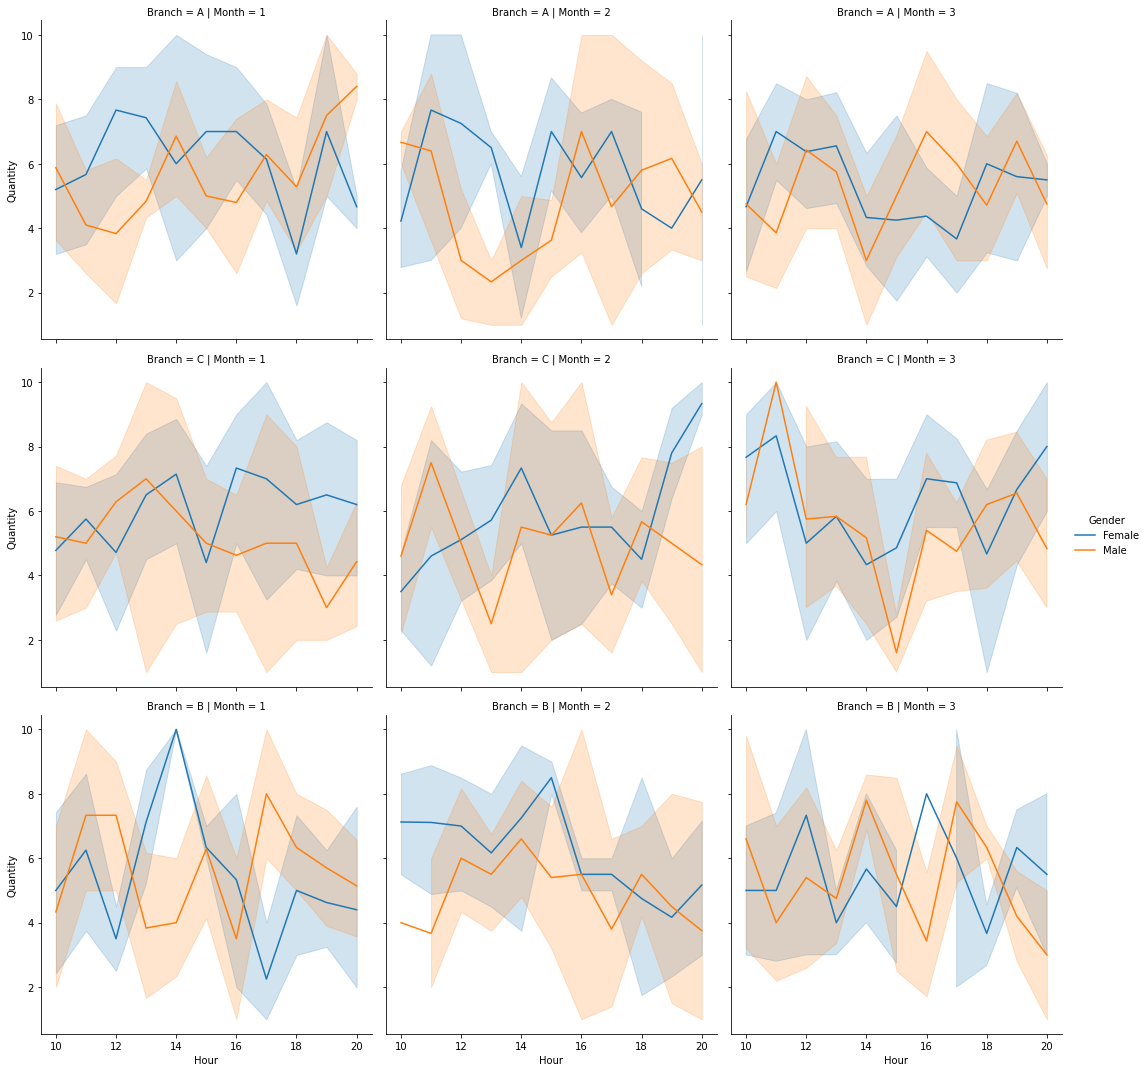

In [33]:
# Hangi şubedeki ne kadar miktarda zamana ve cinsiyete bağlı bir şekilde grafik gösterimi
sns.relplot(x="Hour",y="Quantity",col="Month",row="Branch",kind="line",hue="Gender",data=df)